# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

4.6034675781
[0.011319021404467802, 2.850259056580311e-09]


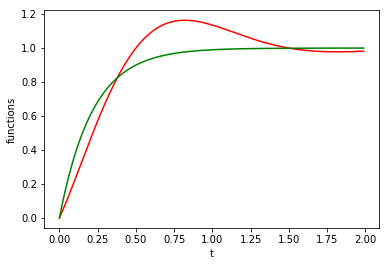

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize_scalar

def g(t): #Function g(t), which is given.
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

def f(a,t): #Function f(a,t), which is a family in a, to be optimized with respect to L2 norm from g(t)
    return 1 - (np.exp(-1*a*t))

t1 = np.arange(0.0, 2.0, 0.01) #Time variable to compute integration, and to draw the plots.

def integrand(a):  #This function computes the L2 norm between f and g in [0,2] for an argument a.
 ## Unable to call this from minimize_scalar, so computing integral manually:   quad((f(a,t)-g(t))**2,0,2)
    sum=0
    for t in (t1):
        y = (f(a,t)-g(t))**2
        sum = sum + y*0.01
    sum = np.sqrt(sum)
    return sum
    ##return quad(lambda t: f(a,t)-g(t))**2,0,2)


optResult = minimize_scalar(integrand)   ## a that minimizes the L2 norm between f and g
amin = optResult.x
print (amin)

## The residual mean squared error (RMS) between [0,2]
RMS = [x/2 for x in quad(lambda t: (f(amin,t)-g(t))**2,0,2)]
print (RMS)

fig = plt.figure(1)
plt.plot(t1, g(t1), 'r')
plt.plot(t1,f(amin,t1),'g')
plt.xlabel('t')
plt.ylabel('functions')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

In [ ]:
The Solution is as follows: The L2 norm between f and g in [0,2] is given as sqrt(\int_{0}^{2} (f(a,t)-g(t))^2 dt). I minimized this using the minimize_scalar function in scipy. The minminizer $a$ is obtained as the return value from the function. With this, the residual mean squared error is computed.

In [ ]:
The solutions are: The min a = 4.6034675781, and the RMS is 0.011319021404467802.